In [78]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [79]:
tracks = pd.read_csv('../../Dataset/data_processed.csv')

In [80]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381292 entries, 0 to 381291
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        381292 non-null  int64  
 1   explicit          381292 non-null  int64  
 2   release_date      381292 non-null  int64  
 3   danceability      381292 non-null  float64
 4   energy            381292 non-null  float64
 5   loudness          381292 non-null  float64
 6   speechiness       381292 non-null  float64
 7   acousticness      381292 non-null  float64
 8   instrumentalness  381292 non-null  float64
 9   liveness          381292 non-null  float64
 10  valence           381292 non-null  float64
 11  tempo             381292 non-null  float64
 12  time_signature    381292 non-null  int64  
 13  key_0             381292 non-null  int64  
 14  key_1             381292 non-null  int64  
 15  key_2             381292 non-null  int64  
 16  key_3             38

In [81]:
tracks.popularity.describe()

count    381292.000000
mean         34.152476
std          16.387268
min           1.000000
25%          22.000000
50%          34.000000
75%          45.000000
max         100.000000
Name: popularity, dtype: float64

In [82]:
mean_popularity = 34
tracks["popularity"] = [ 1 if i >= mean_popularity else 0 for i in tracks.popularity ]

In [83]:
tracks.head()

,popularity,explicit,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,minor,major,duration
0,1,0,2008,0.484,0.265,-11.101,0.0322,0.394,0.000000,0.149,...,0,0,0,0,0,0,0,0,1,160
1,1,0,2020,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.139,...,0,0,0,0,0,0,0,0,1,160
2,1,0,2008,0.405,0.365,-10.226,0.0289,0.255,0.000005,0.163,...,0,1,0,0,0,0,0,1,0,142
3,1,0,2008,0.477,0.352,-14.165,0.0300,0.406,0.000000,0.122,...,0,0,0,0,0,0,0,0,1,157
4,0,0,2018,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.904,...,0,0,1,0,0,0,0,0,1,187


In [84]:
#tracks['popularity'] = pd.qcut(tracks['popularity'], q=2, labels=[0, 1])

In [85]:
X  = tracks.drop(['popularity'], axis=1)
y = tracks['popularity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305033 entries, 208042 to 303716
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   explicit          305033 non-null  int64  
 1   release_date      305033 non-null  int64  
 2   danceability      305033 non-null  float64
 3   energy            305033 non-null  float64
 4   loudness          305033 non-null  float64
 5   speechiness       305033 non-null  float64
 6   acousticness      305033 non-null  float64
 7   instrumentalness  305033 non-null  float64
 8   liveness          305033 non-null  float64
 9   valence           305033 non-null  float64
 10  tempo             305033 non-null  float64
 11  time_signature    305033 non-null  int64  
 12  key_0             305033 non-null  int64  
 13  key_1             305033 non-null  int64  
 14  key_2             305033 non-null  int64  
 15  key_3             305033 non-null  int64  
 16  key_4          

In [88]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [89]:
from sklearn.decomposition import PCA


# Create a PCA transformer with n_components=0.95 to preserve 95% of the variance
pca = PCA(n_components=0.95)

pca.fit(X_train_std)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

X_train = X_train_pca
X_test = X_test_pca

In [90]:
X_train.shape, X_test.shape

((305033, 21), (76259, 21))

In [91]:
criterion = ['gini', 'entropy']
# max_depth = [2,5,10,15]
# min_samples_split = [2,3,4,6,10,15]

# max_depth = [10,12,15]
# min_samples_split = [6,10,15]

# max_depth = [8,10,12]
# min_samples_split = [8,10,12]
# min_samples_leaf=[1,2,3,4]

max_depth = [8,10,12]
min_samples_split = [8,10,12]
min_samples_leaf=[1,2,3,4]

In [92]:
parameters = dict(max_depth=max_depth,
                 min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf)

In [93]:
tree_clf = DecisionTreeClassifier()
# tree_clf.fit(X_train,y_train)

In [95]:
tree_clf_gs = GridSearchCV(tree_clf, parameters)
tree_clf_gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [8, 10, 12]})

In [96]:
# print('Best Criterion:', tree_clf_gs.best_estimator_.get_params()['criterion'])
print('Best max_depth:', tree_clf_gs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', tree_clf_gs.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', tree_clf_gs.best_estimator_.get_params()['min_samples_leaf'])
# print(); 
# print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best max_depth: 10
Best min_samples_split: 12
Best min_samples_leaf: 1


In [ ]:
X_train.columns[2]

In [98]:
%%time
tree_clf = DecisionTreeClassifier(max_depth=10, max_features='auto', criterion='gini', min_samples_leaf=1,
                               min_samples_split=12)
tree_clf.fit(X_train,y_train)

c:\Users\abdur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


CPU times: total: 2.92 s
Wall time: 2.97 s


DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=12)

In [99]:
y_pred = tree_clf.predict(X_test)

In [100]:
accuracy_score(y_test, y_pred)

0.6621775790398511

In [101]:
y_pred_train = tree_clf.predict(X_train)

In [102]:
accuracy_score(y_pred_train, y_train)

0.6755170752016995

In [103]:
print(tree_clf.tree_.max_depth)

10


In [104]:
print(confusion_matrix(y_test, y_pred))
print("Classification report\n")
print(classification_report(y_test, y_pred))

[[23999 12997]
 [12765 26498]]
Classification report

              precision    recall  f1-score   support

           0       0.65      0.65      0.65     36996
           1       0.67      0.67      0.67     39263

    accuracy                           0.66     76259
   macro avg       0.66      0.66      0.66     76259
weighted avg       0.66      0.66      0.66     76259



In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
lr_probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc

0.7534197184982144

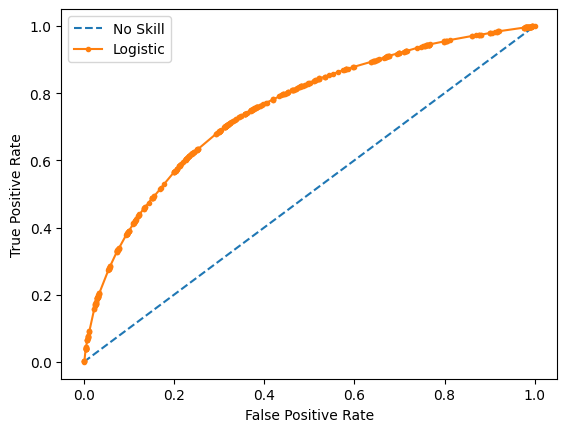

In [105]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
np.save("fpr_DT", fpr)
np.save("tpr_DT", tpr)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

SVM: f1=0.673 auc=0.754
0.5148638193524698


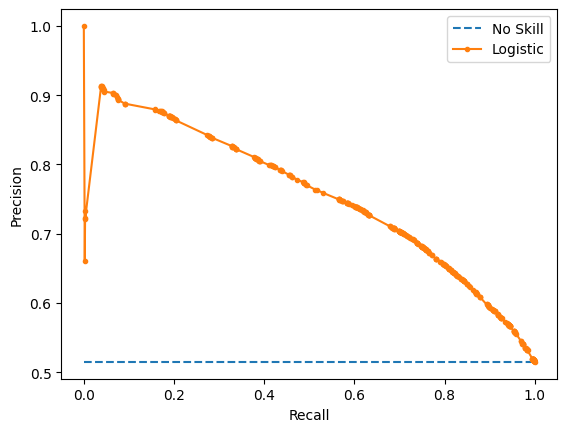

In [106]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, lr_probs)
np.save("lrp_DT", lr_precision)
np.save("lrr_DT", lr_recall)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y = track.loc[:, 'popularity']
X = track.drop('popularity', axis=1)

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()
svm_model = SVC()
lgbm_model = LGBMClassifier()
xgboost_model = XGBClassifier()

In [ ]:
log_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

In [ ]:
log_acc = log_model.score(X_test, y_test)
knn_acc = knn_model.score(X_test, y_test)
dec_acc = dec_model.score(X_test, y_test)
mlp_acc = mlp_model.score(X_test, y_test)
# svm_acc = svm_model.score(X_test, y_test)
# lgbm_acc = lgbm_model.score(X_test, y_test)
# xgboost_acc = xgboost_model.score(X_test, y_test)

In [ ]:
print("Logistic Regression Accuracy:", log_acc)
print("K-Nearest-Neighbors Accuracy:", knn_acc)
print("Decision Tree Accuracy:", dec_acc)
print("Multi-layer Perceptron Accuracy:", mlp_acc)
print("Support vector machine Accuracy:", svm_acc)
print("Light Gradient Boosting Machine Accuracy:", lgbm_acc)
print("eXtreme Gradient Boosting Accuracy:", xgboost_acc)

Logistic Regression Accuracy: 0.7425305198291356
K-Nearest-Neighbors Accuracy: 0.7734238229733199
Decision Tree Accuracy: 0.8387175836231647


In [ ]:
fig = px.bar(
    x=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine", "Light Gradient Boosting Machine Accuracy", "eXtreme Gradient Boosting Accuracy:"],
    y=[log_acc, knn_acc, dec_acc, mlp_acc, svm_acc],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine", "Light Gradient Boosting Machine Accuracy", "eXtreme Gradient Boosting Accuracy:"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()

In [ ]:
track.popularity.value_counts()

0    293807
1    277406
Name: popularity, dtype: int64

In [ ]:
import plotly.express as px


In [ ]:
fig = px.bar(
    x=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree"],
    y=[log_acc, knn_acc, dec_acc],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()